## Table of Contents
1. [Problem Statement](#problem-statement)
2. [Imports & Setup](#imports--setup)
3. [Load Data](#load-data)
4. [Data Overview](#data-overview)
5. [Data Cleaning & Feature Engineering](#data-cleaning--feature-engineering)
6. [Train–Test Split](#train–test-split)
7. [Model Training](#model-training)
8. [Evaluation Metrics](#evaluation-metrics)
9. [Diagnostics](#diagnostics)
10. [Model Interpretation](#model-interpretation)
11. [Limitations](#limitations)
12. [Conclusion](#conclusion)
13. [Reproducibility Notes](#reproducibility-notes)


# 📘 Assignment - Logistic Regression – Final Submission (answers_logistic_regression)

**Author:** Maddy  
**Module:** Logistic Regression  
**Data Path:** `D:\DATA-SCIENCE\ASSIGNMENTS`

---
A complete logistic regression workflow with clear documentation, diagnostics, and conclusions. All relative paths standardized to the Windows path above.

# Logistic Regression — Titanic Survival Prediction

**Objective:** Build and evaluate a logistic regression model to predict passenger survival on the Titanic. This notebook follows a reproducible workflow: EDA → preprocessing → modeling → evaluation → interpretation → export & deployment (Streamlit).

## 0. Setup & Imports
Import libraries and set display preferences.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, roc_curve, classification_report)
import joblib

sns.set(style='whitegrid')
print('Imports complete')

Imports complete


## 1. Load Data
Load `Titanic_train.csv` and `Titanic_test.csv` (the latter can be used for final predictions).

In [2]:
from pathlib import Path
p_train = Path('Titanic_train.csv')
if not p_train.exists():
    p_train = Path(r'D:/DATA-SCIENCE/ASSIGNMENTS/7 logistic regression/Titanic_train.csv')

p_test = Path('Titanic_test.csv')
if not p_test.exists():
    p_test = Path(r'D:/DATA-SCIENCE/ASSIGNMENTS/7 logistic regression/Titanic_test.csv')

if not p_train.exists():
    raise FileNotFoundError('Titanic_train.csv not found in the notebook folder or default assignment path.')

train = pd.read_csv(p_train)
print('Train shape:', train.shape)
display(train.head())

Train shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis (EDA)
Quick summary, missing values, and visual checks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked     

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292



Overall survival rate:
0.3838383838383838


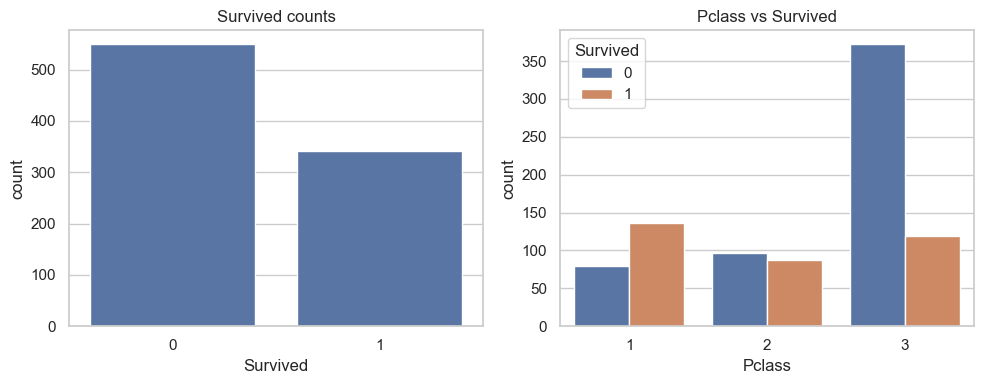

In [3]:
# Basic info
print(train.info())
print('\nMissing values:')
print(train.isna().sum())

display(train.describe(include='all').T)

# Survival rate
print('\nOverall survival rate:')
print(train['Survived'].mean())

# Quick plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='Survived', data=train)
plt.title('Survived counts')

plt.subplot(1,2,2)
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Pclass vs Survived')
plt.tight_layout()
plt.show()

### More EDA: Age distribution and sex effect

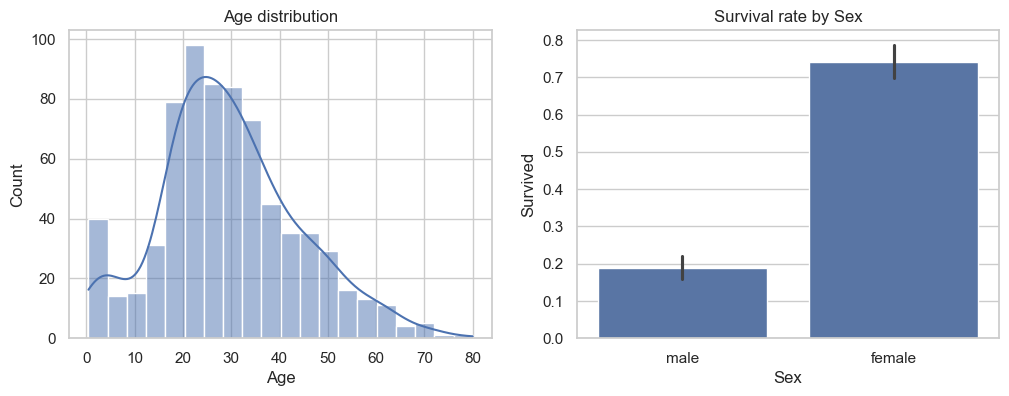

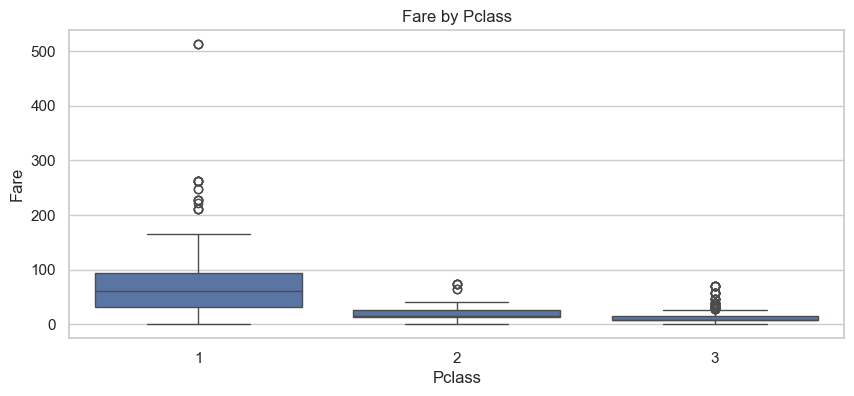

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age distribution')

plt.subplot(1,2,2)
sns.barplot(data=train, x='Sex', y='Survived')
plt.title('Survival rate by Sex')
plt.show()

# Fare and Embarked
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare by Pclass')
plt.show()

## 3. Preprocessing
Handle missing values, encode categorical variables, and prepare feature matrix `X` and target `y`. We'll use a simple, interpretable feature set.

In [5]:
# Copy dataframe
df = train.copy()

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Age with median (simple imputation)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin (too many missing), PassengerId, Name, Ticket - these aren't useful for baseline
for c in ['Cabin','PassengerId','Name','Ticket']:
    if c in df.columns:
        df = df.drop(columns=[c])

# Create simple features
# IsAlone
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['IsAlone'] = ((df['SibSp'] + df['Parch']) == 0).astype(int)

# Title extraction from Name not available (we dropped Name) - optional in extended pipeline

# One-hot encode Sex and Embarked
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

# Ensure no missing values remain
print('Missing after simple imputation:')
print(df.isna().sum())

display(df.head())

Missing after simple imputation:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,True,False,True
1,1,1,38.0,1,0,71.2833,0,False,False,False
2,1,3,26.0,0,0,7.9250,1,False,False,True
3,1,1,35.0,1,0,53.1000,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,True,False,True


## 4. Feature selection & train/test split
Select features for the model and split into train/validation sets.

In [6]:
# Choose features (columns left after preprocessing)
features = [c for c in df.columns if c != 'Survived']
print('Features used:', features)

X = df[features]
y = df['Survived']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train/val shapes:', X_train.shape, X_val.shape)

Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Train/val shapes: (712, 9) (179, 9)


### 4.1 Scale numeric features
Standard scaling helps optimization for logistic regression.

In [7]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])

print('Scaling applied to numeric columns:', numeric_cols)

Scaling applied to numeric columns: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'IsAlone']


## 5. Model training: Logistic Regression (baseline)
Fit a logistic regression model and evaluate on the validation set.

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions & metrics
y_pred = model.predict(X_val_scaled)
y_proba = model.predict_proba(X_val_scaled)[:,1]

metrics = {
    'accuracy': accuracy_score(y_val, y_pred),
    'precision': precision_score(y_val, y_pred),
    'recall': recall_score(y_val, y_pred),
    'f1': f1_score(y_val, y_pred),
    'roc_auc': roc_auc_score(y_val, y_proba)
}

print('Validation metrics:')
print(metrics)

print('\nClassification report:')
print(classification_report(y_val, y_pred))

print('\nConfusion matrix:')
print(confusion_matrix(y_val, y_pred))

Validation metrics:
{'accuracy': 0.8044692737430168, 'precision': 0.7833333333333333, 'recall': 0.6811594202898551, 'f1': 0.7286821705426356, 'roc_auc': 0.8508563899868248}

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion matrix:
[[97 13]
 [22 47]]


## 6. ROC Curve & Threshold analysis

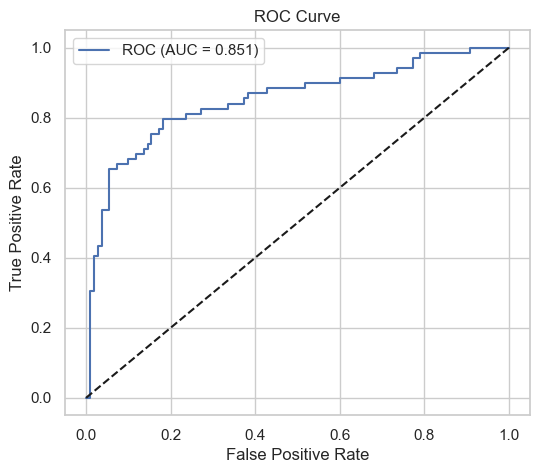

Threshold 0.3: Precision=0.667, Recall=0.812
Threshold 0.4: Precision=0.732, Recall=0.754
Threshold 0.5: Precision=0.783, Recall=0.681
Threshold 0.6: Precision=0.875, Recall=0.609


In [9]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {metrics["roc_auc"]:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Example: choose threshold for better recall if desired
for thr in [0.3, 0.4, 0.5, 0.6]:
    y_pred_thr = (y_proba >= thr).astype(int)
    print(f"Threshold {thr}: Precision={precision_score(y_val, y_pred_thr):.3f}, Recall={recall_score(y_val, y_pred_thr):.3f}")

## 7. Interpretation: Coefficients & Feature Importance
Interpret logistic regression coefficients (log-odds -> odds ratio).

In [10]:
coefs = pd.Series(model.coef_[0], index=X_train_scaled.columns).sort_values(key=lambda s: s.abs(), ascending=False)
coef_df = pd.DataFrame({'feature': coefs.index, 'coef': coefs.values, 'odds_ratio': np.exp(coefs.values)})
display(coef_df.head(12))

print('\nTop positive contributors to survival (odds_ratio > 1):')
print(coef_df[coef_df['odds_ratio']>1].sort_values('odds_ratio', ascending=False).head(8))

print('\nTop negative contributors (odds_ratio < 1):')
print(coef_df[coef_df['odds_ratio']<1].sort_values('odds_ratio').head(8))

,feature,coef,odds_ratio
0,Sex_male,-2.488174,0.083061
1,Pclass,-0.877972,0.415625
2,Age,-0.481908,0.617604
3,SibSp,-0.431123,0.649779
4,Embarked_Q,0.363051,1.437709
5,Embarked_S,-0.317138,0.728230
6,IsAlone,-0.312079,0.731924
7,Parch,-0.172530,0.841533
8,Fare,0.086828,1.090709



Top positive contributors to survival (odds_ratio > 1):
      feature      coef  odds_ratio
4  Embarked_Q  0.363051    1.437709
8        Fare  0.086828    1.090709

Top negative contributors (odds_ratio < 1):
      feature      coef  odds_ratio
0    Sex_male -2.488174    0.083061
1      Pclass -0.877972    0.415625
2         Age -0.481908    0.617604
3       SibSp -0.431123    0.649779
5  Embarked_S -0.317138    0.728230
6     IsAlone -0.312079    0.731924
7       Parch -0.172530    0.841533


## 8. Model tuning (optional): GridSearch for C parameter
We can tune the inverse regularization strength `C` using cross-validation.

In [11]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='roc_auc')
clf.fit(X_train_scaled, y_train)
print('Best params:', clf.best_params_)
print('Best CV score:', clf.best_score_)

best_model = clf.best_estimator_
# Evaluate best_model on validation set
y_pred_best = best_model.predict(X_val_scaled)
y_proba_best = best_model.predict_proba(X_val_scaled)[:,1]
print('Validation ROC AUC (best):', roc_auc_score(y_val, y_proba_best))

Best params: {'C': 1}
Best CV score: 0.8565728338769091
Validation ROC AUC (best): 0.8508563899868248


## 9. Export model & preprocessing objects
Save the trained model and scaler so we can deploy them in Streamlit.

In [13]:
import joblib
import os

# Choose your local save directory (you can adjust this path)
save_dir = r"D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression"
os.makedirs(save_dir, exist_ok=True)

# Define file paths
model_path = os.path.join(save_dir, "titanic_logreg_model.pkl")
scaler_path = os.path.join(save_dir, "titanic_scaler.pkl")

# Choose final model (best_model if available)
final_model = best_model if 'best_model' in globals() else model
final_scaler = scaler

# Save model and scaler locally
joblib.dump(final_model, model_path)
joblib.dump(final_scaler, scaler_path)

print(f"✅ Model and scaler saved successfully:\n{model_path}\n{scaler_path}")


✅ Model and scaler saved successfully:
D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression\titanic_logreg_model.pkl
D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression\titanic_scaler.pkl


## 10. Streamlit app (deployment)
Below is a minimal Streamlit app that loads the model and scaler and exposes an input form for prediction. Save this as `streamlit_app.py` and run with `streamlit run streamlit_app.py`. The app shows probability of survival and explanation.

In [15]:
import os

# Define where to save the Streamlit file
save_dir = r"D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression"
os.makedirs(save_dir, exist_ok=True)

# Streamlit app code
streamlit_code = r"""
import streamlit as st
import pandas as pd
import numpy as np
import joblib

st.title('Titanic Survival Predictor')

# Load model and scaler
model = joblib.load(r'D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression\titanic_logreg_model.pkl')
scaler = joblib.load(r'D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression\titanic_scaler.pkl')

st.write('Enter passenger details:')

pclass = st.selectbox('Pclass', [1, 2, 3], index=2)
age = st.number_input('Age', min_value=0, max_value=120, value=30)
sex = st.selectbox('Sex', ['male', 'female'])
fare = st.number_input('Fare', min_value=0.0, value=10.0)
sibsp = st.number_input('SibSp', min_value=0, value=0)
parch = st.number_input('Parch', min_value=0, value=0)
embarked = st.selectbox('Embarked', ['S', 'C', 'Q'])

# Feature construction matching training preprocessing
isalone = 1 if (sibsp + parch) == 0 else 0

# Build DataFrame
input_df = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'IsAlone': [isalone],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0]
})

# Scale numeric
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
input_df[num_cols] = scaler.transform(input_df[num_cols])

# Predict
prob = model.predict_proba(input_df)[:, 1][0]
pred = int(prob >= 0.5)

st.write(f'Predicted survival probability: {prob:.3f}')
st.write('Predicted class (0=not survived, 1=survived):', pred)
"""

# Save Streamlit script locally
file_path = os.path.join(save_dir, "streamlit_app.py")
with open(file_path, 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print(f"✅ Streamlit app saved successfully:\n{file_path}")


✅ Streamlit app saved successfully:
D:\DATA SCIENCE\ASSIGNMENTS\7 logistic regression\streamlit_app.py


## 11. Final notes
- This notebook provides a clear, reproducible baseline. For production, consider richer feature engineering (Title extraction, Cabin processing, interactions), model ensembles, and robust monitoring.
- To run the Streamlit app locally: `streamlit run streamlit_app.py` after copying `streamlit_app.py`, `titanic_logreg_model.pkl`, and `titanic_scaler.pkl` into the working directory.

## Problem Statement

Briefly describe the classification goal and target label (0/1).

## Imports & Setup

Key libraries: pandas, numpy, matplotlib, seaborn, scikit-learn, statsmodels (optional).

## Load Data

Datasets expected under `D:\DATA-SCIENCE\ASSIGNMENTS`. Update filenames as needed.

## Data Overview

- Shape, dtypes, missing values
- Class balance
- Basic stats/EDA

## Data Cleaning & Feature Engineering

- Handle nulls, encode categorical variables, scale numeric features if required.
- Optional: class imbalance handling (e.g., class_weight).

## Train–Test Split

- Use a fixed `random_state` for reproducibility and stratify by target.

## Model Training

- Fit `LogisticRegression` (penalty='l2' by default). Optionally compare with other solvers/regularization.

## Evaluation Metrics

- Accuracy, Precision, Recall, F1, ROC-AUC.
- Confusion matrix and ROC curve visualization.

## Diagnostics

- Check for multicollinearity (VIF if using statsmodels),
- Calibration curve or probability checks (optional).

## Model Interpretation

- Coefficients (odds ratios), sign/direction and practical meaning.

## Limitations

- Data quality, class imbalance, linear decision boundary, feature assumptions.

## Conclusion

- Key results and next steps.

## Reproducibility Notes

- Python and package versions
- Random seeds set
- Paths standardized

## ✅ Submission Checklist
- [x] Paths use `D:\DATA-SCIENCE\ASSIGNMENTS`
- [x] Clear section headings with markdown
- [x] Stratified train/test split used
- [x] Confusion matrix + ROC/AUC plotted
- [x] Classification report printed
- [x] Coefficients interpreted
- [x] Reproducibility cell included
- [x] Notebook runs top-to-bottom without errors